# **Challenge Nexialog**

#### Objectif du projet
<p style="text-align: justify;">
Des tests sont réalisés dans toutes les boxs, permettant d'identifier implicitement les interruptions de réseau.
L'objectif est de mettre en place une approche non supervisé pour détecter des futurs problèmes sur une partie du réseau → Détection « d’anneaux ». Il faut détecter les noeuds du réseau qui sont défaillants en essayant d’anticiper le plus possible à l’avance.
</p>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import seaborn as sns

### Importation

In [2]:
df = pd.read_parquet(r'data\250327_tests_fixe_dns_sah_202412_202501.parquet', engine="pyarrow")

In [3]:
df.head()

,date_hour,code_departement,olt_model,olt_name,peag_nro,boucle,dsp,pebib,pop_dns,nb_test_dns,avg_dns_time,std_dns_time,nb_test_scoring,avg_latence_scoring,std_latence_scoring,avg_score_scoring,std_score_scoring,nb_client_total
0,2024-12-01,01,M11,01_olt_3,01_peag_3,BU1464,dsp_1,69_pebib_3,69_lyon,23,6.845641,0.377309,9,11.437500,0.281250,3.258823,0.375156,32
1,2024-12-01,01,M11,01_olt_4,01_peag_3,BU1464,dsp_1,69_pebib_3,69_lyon,10,7.060350,0.392031,4,12.656250,2.079476,2.576471,1.272078,14
2,2024-12-01,01,M13,01_olt_5,01_peag_4,BU458,dsp_1,None,69_lyon,28,2.787241,0.410001,16,8.542969,0.512205,2.868750,0.714469,44
3,2024-12-01,01,M13,71_olt_6,71_peag_5,BU1336,dsp_1,None,69_lyon,4,2.292375,0.241369,2,7.875000,0.000000,3.485294,0.000000,6
4,2024-12-01,01,M20,01_olt_10,01_peag_9,BU460,dsp_1,None,69_lyon,6,6.302625,0.447352,4,11.109375,0.281250,2.880882,0.379412,10


## EDA

#### Exploration

In [5]:
print(df.shape)
df.head()

(9096908, 18)


,date_hour,code_departement,olt_model,olt_name,peag_nro,boucle,dsp,pebib,pop_dns,nb_test_dns,avg_dns_time,std_dns_time,nb_test_scoring,avg_latence_scoring,std_latence_scoring,avg_score_scoring,std_score_scoring,nb_client_total
0,2024-12-01,01,M11,01_olt_3,01_peag_3,BU1464,dsp_1,69_pebib_3,69_lyon,23,6.845641,0.377309,9,11.437500,0.281250,3.258823,0.375156,32
1,2024-12-01,01,M11,01_olt_4,01_peag_3,BU1464,dsp_1,69_pebib_3,69_lyon,10,7.060350,0.392031,4,12.656250,2.079476,2.576471,1.272078,14
2,2024-12-01,01,M13,01_olt_5,01_peag_4,BU458,dsp_1,None,69_lyon,28,2.787241,0.410001,16,8.542969,0.512205,2.868750,0.714469,44
3,2024-12-01,01,M13,71_olt_6,71_peag_5,BU1336,dsp_1,None,69_lyon,4,2.292375,0.241369,2,7.875000,0.000000,3.485294,0.000000,6
4,2024-12-01,01,M20,01_olt_10,01_peag_9,BU460,dsp_1,None,69_lyon,6,6.302625,0.447352,4,11.109375,0.281250,2.880882,0.379412,10


In [7]:
df.tail(2)

,date_hour,code_departement,olt_model,olt_name,peag_nro,boucle,dsp,pebib,pop_dns,nb_test_dns,avg_dns_time,std_dns_time,nb_test_scoring,avg_latence_scoring,std_latence_scoring,avg_score_scoring,std_score_scoring,nb_client_total
9096906,2025-01-31 23:00:00,95,old1,95_olt_5602,95_peag_2919,BU24,dsp_1,92_pebib_11,77_mit,12,3.548938,0.802115,7,5.6250,0.918559,2.301681,0.235630,19
9096907,2025-01-31 23:00:00,95,old1,95_olt_5603,78_peag_2918,BU22,dsp_1,78_pebib_184,94_cbv,34,2.701279,0.983747,9,5.6875,0.713979,2.273529,0.297753,43


In [44]:
df.nunique()

date_hour               1488
code_departement          96
olt_model                  7
olt_name                6061
peag_nro                3176
boucle                   537
dsp                       32
pebib                    212
pop_dns                    8
nb_test_dns              579
avg_dns_time           35743
std_dns_time           29884
nb_test_scoring          185
avg_latence_scoring    16181
std_latence_scoring    21260
avg_score_scoring       2806
std_score_scoring       1660
nb_client_total          664
dtype: int64

C'est une période de tests de 2 mois avec une fréquence par heure

In [8]:
df.dtypes

date_hour              datetime64[ns]
code_departement               object
olt_model                      object
olt_name                       object
peag_nro                       object
boucle                         object
dsp                            object
pebib                          object
pop_dns                        object
nb_test_dns                     int64
avg_dns_time                  float64
std_dns_time                  float64
nb_test_scoring                 int64
avg_latence_scoring           float64
std_latence_scoring           float64
avg_score_scoring             float64
std_score_scoring             float64
nb_client_total                 int64
dtype: object

In [14]:
def afficher_pourcentage_valeurs_manquantes(df):
    pourcentage_manquantes = round(df.isna().mean() * 100, 2)
    pourcentage_manquantes = pourcentage_manquantes.sort_values(ascending=False)
    print("Pourcentage de valeurs manquantes par variable (en %) :\n")
    print(pourcentage_manquantes)

afficher_pourcentage_valeurs_manquantes(df)

Pourcentage de valeurs manquantes par variable (en %) :

pebib                  44.60
std_score_scoring      23.60
std_latence_scoring    23.60
std_dns_time            9.43
avg_latence_scoring     8.61
avg_score_scoring       8.61
avg_dns_time            7.88
pop_dns                 7.88
olt_model               0.09
date_hour               0.00
code_departement        0.00
nb_test_dns             0.00
peag_nro                0.00
boucle                  0.00
olt_name                0.00
dsp                     0.00
nb_test_scoring         0.00
nb_client_total         0.00
dtype: float64


Preprocessing de la date

In [11]:
df['date_hour'] = pd.to_datetime(df['date_hour'])
df['date_hour'].tail()

Modèles d'OLT :

In [12]:
df.olt_model.unique()

**Observons les liens entre les différentes étapes du réseau**

In [13]:
df['OLT_PEAG_boucle'] = df['olt_name'] + df['peag_nro']  + df['boucle'] 

In [14]:
print('Nombre total de combinaisons OLT x PEAG x boucle :',df['OLT_PEAG_boucle'].nunique())
print('Nombre de noms de OLT :', df.olt_name.nunique())
print('Nombre de noms de PEAG :', df.peag_nro.nunique())
print('Nombre de noms de boucle :', df.boucle.nunique())
print('Nombre de noms de PEBIB :', df.pebib.nunique())
print('Nombre de noms de DSP :', df.dsp.nunique())


# print('Nombre de départements :', df.code_departement.nunique())

Nombre d'associations de chaque noeud à l'autre

In [15]:
print('Nombre d\'OLT par PEAG :', round(df.groupby('peag_nro')['olt_name'].nunique().mean(), 2))
print('Nombre de PEAG par boucle :', round(df.groupby('boucle')['peag_nro'].nunique().mean(), 2))
print('Nombre de boucle par PEBIB :', round(df.groupby('pebib')['boucle'].nunique().mean(), 2))
print('Nombre de PEBIB par DSP :', round(df.groupby('dsp')['pebib'].nunique().mean(), 2))

Nombre de noeuds testés par heure

In [16]:
exemple_date_list = [
    '2024-12-30 23:00:00',
    '2025-01-14 01:00:00',
    '2025-01-01 10:00:00',
    '2024-12-17 12:00:00',
    '2024-12-12 07:00:00'
]

for date in exemple_date_list:
    df_exemple = df[df['date_hour'] == date].copy()
    print('Nombre de boucles testées le', date, ':')
    print('Nombre de lignes pour cette date :', len(df_exemple))
    print('Nombre total de boucles x PEAG x OLT :',df_exemple['OLT_PEAG_boucle'].nunique())
    print('Nombre de noms de OLT :', df_exemple.olt_name.nunique())
    print('Nombre de noms de PEAG :', df_exemple.peag_nro.nunique())
    print('Nombre de noms de PEBIB :', df_exemple.pebib.nunique())
    print('Nombre de noms de DSP :', df_exemple.dsp.nunique())
    print('-'*5)
    print('Nombre de départements :', df_exemple.code_departement.nunique())
    print('-'*50)
    

#### Data Analyse

**Obervons un seul OLT particulier**

In [17]:
olt_choisi = '01_olt_5'

In [18]:
df_one_olt = df[df['olt_name'] == olt_choisi]
print(df_one_olt.shape)
print('Nombre d\'heures :', df_one_olt['date_hour'].nunique())
df_one_olt.head()

24 h * 31 jours * 2 mois = 1488. Ici, on a 1632 lignes, observons pourquoi :

In [19]:
df_one_olt_duplicate = df_one_olt[df_one_olt['date_hour'].duplicated(keep=False)]
print('Nombre de lignes qui ont été dupliquées :', len(df_one_olt_duplicate))

Observons les lignes qui sont dupliquées :

In [20]:
df_one_olt_duplicate.sort_values(by='date_hour', inplace=True)
df_one_olt_duplicate.head()

Cela semble être des erreurs, le même test affiché plusieurs fois. Il faut donc les supprimer.

In [21]:
df_one_olt = df_one_olt.drop_duplicates(subset='date_hour', keep='first')
df_one_olt.shape

**Visualisations**

Ajout de colonnes

In [22]:
pio.renderers.default = 'notebook'
col_palette=['#5533FF','#19A368','#521265','#751818',"#FF5733",'#5533FF','#19A368','#5533FF','#19A368', '#521265']
col_to_plot = ['nb_test_dns', 'avg_dns_time', 'std_dns_time', 'nb_test_scoring', 'avg_latence_scoring',
       'std_latence_scoring', 'avg_score_scoring', 'std_score_scoring', 'nb_client_total']

Lineplots

In [23]:
# visualisation d'un OLT
for i, feature in enumerate(col_to_plot):
    plt.figure(figsize=(10, 5))
    plt.plot(df_one_olt['date_hour'], df_one_olt[feature], label=feature, color=col_palette[i])
    
    plt.title(f"{feature} - {olt_choisi}")
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.grid()

    plt.xticks(rotation=45)
    
    plt.show()

On peut supposer que les pics dans les données de variables de test sont associées à des problèmes sur le réseau. Ce sont certainement des anomalies.

Histogrammes (Distribution)

In [24]:
# Visualisation avec des histogrammes
for i, feature in enumerate(col_to_plot):
    plt.figure(figsize=(10, 5))

    plt.hist(df_one_olt[feature], bins=100, color=col_palette[i], alpha=0.7, label=feature)
    

    plt.title(f"Distribution de {feature} - {olt_choisi}")
    plt.xlabel(feature)
    plt.ylabel('Fréquence')
    
    plt.legend()
    plt.grid(True)

    plt.show()

Les valeurs des queues de distribution sont certainement des anomalies

# Sélection des données

In [95]:
def visualize_distribution_single(df, label):
    plt.figure(figsize=(12, 6))
    sns.histplot(df['count'], bins=30)
    plt.title(f'Distribution of Counts - {label}')
    plt.xlabel('Count')
    plt.ylabel('Frequency')
    plt.show()

In [11]:
# Check how many rows in df thats have 0 in std columns
print('Number of rows with 0 in std columns:')
print(df[(df['std_dns_time'] == 0) | (df['std_latence_scoring'] == 0) | (df['std_score_scoring'] == 0)].shape[0])


Number of rows with 0 in std columns:
1209210


In [173]:
df = pd.read_parquet(r'data\250327_tests_fixe_dns_sah_202412_202501.parquet', engine="pyarrow")

def select_the_data(df, seuil):
    """  
    Cette fonction récupère un DataFrame et un seuil en paramètre et retourne un nouveau DataFrame
    contenant uniquement les combinaisons PEAG x OLT x PEBIB x boucle x code_departement, après :
      - suppression des doublons,
      - arrondi des colonnes de tests,
      - suppression des lignes avec écarts-types égaux à 0,
      - puis suppression des groupes (basés sur PEAG_OLT_PEBIB) qui ont moins de 'seuil' observations.
    """
    initial_shape = df.shape
    print(f'Shape du DF original : {initial_shape}')

    cols_to_fix = ['avg_dns_time', 'std_dns_time', 'std_latence_scoring', 
                   'std_score_scoring', 'avg_latence_scoring', 'avg_score_scoring']
    std_cols = ['std_dns_time', 'std_latence_scoring', 'std_score_scoring']

    # Arrondir pour éviter que des lignes identiques ne soient considérées différentes
    df[cols_to_fix] = df[cols_to_fix].round(3)
    df['pebib'] = df['pebib'].fillna('PEBIB non defini')

    # Suppression des doublons complets
    df = df.drop_duplicates()
    print('Suppression des doublons complets :', initial_shape[0] - df.shape[0], 'lignes supprimées')
    shape_after_full_drop = df.shape

    # Suppression des doublons sur les colonnes clés
    df = df.drop_duplicates(subset=['date_hour', 'peag_nro', 'olt_name', 'pebib', 'boucle', 
                                      'code_departement', 'olt_model', 'dsp', 'pop_dns'], keep='first')
    print('Suppression des doublons sur colonnes clés :', shape_after_full_drop[0] - df.shape[0], 'lignes supprimées')
    shape_after_subset_drop = df.shape

    # Création de la colonne de combinaison unique
    df['PEAG_OLT_PEBIB'] = (df['peag_nro'].astype(str) + df['olt_name'].astype(str) + 
                            df['pebib'].astype(str) + df['boucle'].astype(str) + 
                            df['code_departement'].astype(str))

    # Suppression des lignes où les écarts-types sont nuls
    for col in std_cols:
        avant = df.shape[0]
        df = df[df[col] != 0]
        print(f"Suppression des lignes avec {col} == 0 : {avant - df.shape[0]} lignes supprimées")

    # À ce stade, on effectue le groupby sur PEAG_OLT_PEBIB et on ne garde que les groupes ayant au moins 'seuil' lignes
    group_counts = df.groupby('PEAG_OLT_PEBIB').size()
    valid_groups = group_counts[group_counts >= seuil].index
    avant_group_filter = df.shape[0]
    df = df[df['PEAG_OLT_PEBIB'].isin(valid_groups)]
    print(f"Suppression des groupes avec moins de {seuil} lignes : {avant_group_filter - df.shape[0]} lignes supprimées")

    # Suppression des colonnes non nécessaires
    # df = df.drop(columns=['olt_model', 'olt_name', 'peag_nro', 'boucle', 'dsp', 'pebib', 'pop_dns', 'nb_client_total'])
    print(f"Finalement, nous avons {df.shape[0]} lignes restantes")

    return df

# Exemple d'utilisation
new_df = select_the_data(df, 0)
new_df_grouped = new_df.groupby('PEAG_OLT_PEBIB').size().reset_index(name='count').sort_values(by='count', ascending=False)
new_df.to_csv("new_df.csv", index=False)



Shape du DF original : (9096908, 18)
Suppression des doublons complets : 0 lignes supprimées
Suppression des doublons sur colonnes clés : 0 lignes supprimées
Suppression des lignes avec std_dns_time == 0 : 287 lignes supprimées
Suppression des lignes avec std_latence_scoring == 0 : 873513 lignes supprimées
Suppression des lignes avec std_score_scoring == 0 : 335411 lignes supprimées
Suppression des groupes avec moins de 0 lignes : 0 lignes supprimées
Finalement, nous avons 7887697 lignes restantes


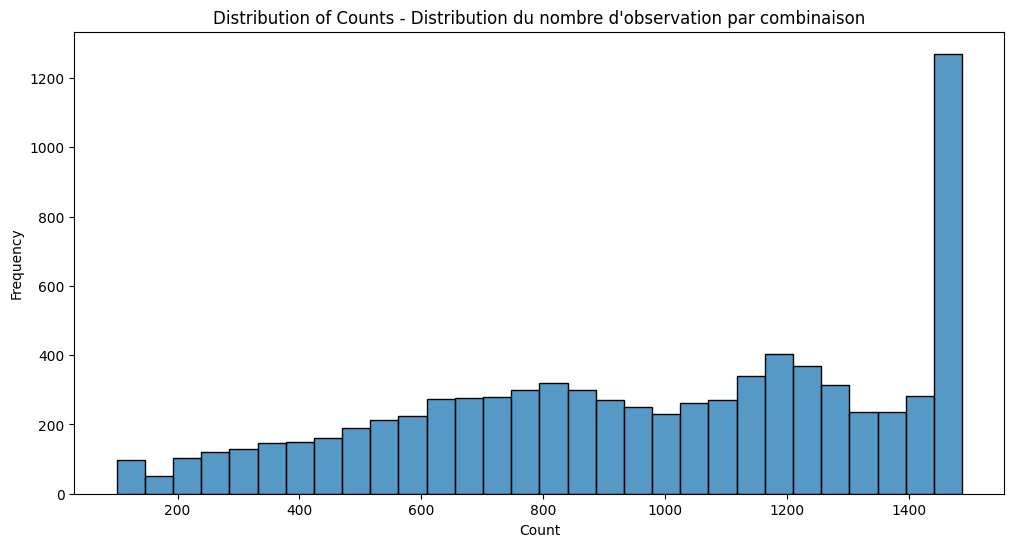

In [96]:
visualize_distribution_single(new_df_grouped, "Distribution du nombre d'observation par combinaison")

In [115]:
new_df_grouped

,PEAG_OLT_PEBIB,count
8488,95_peag_293095_olt_5628PEBIB non definiBU106095,1488
8485,95_peag_292795_olt_562192_pebib_10BU54095,1488
2826,39_peag_121539_olt_225921_pebib_2BU181039,1488
1,01_peag_101_olt_169_pebib_1BU96601,1488
2829,40_peag_121940_olt_2306PEBIB non definiBU56440,1488
...,...,...
6561,84_peag_311384_olt_509484_pebib_37FTTH28284,1
6560,84_peag_311330_olt_154884_pebib_37FTTH28230,1
6558,84_peag_30484_olt_508484_pebib_38FTTH57884,1
3703,62_peag_178762_olt_362759_pebib_206BU49062,1


In [174]:
# 1. Séparation entre lignes avec et sans pebib, puisqu'en séparant ainsi les dataframes, on peut par la suite potentiellement remplacer les PEBIBS dans le DF incomplet depuis le DF complet
new_df_pebib_nan = new_df[new_df['pebib'] == 'PEBIB non defini']
new_df_non_pebib_nan = new_df[new_df['pebib'] != 'PEBIB non defini']

# 2. Récupération des OLT communs : on regarde les lignes des 2 DF qui ont les mêmes OLT (granularité la plus large)
olt_nan = set(new_df_pebib_nan['olt_name'].unique())
olt_non_nan = set(new_df_non_pebib_nan['olt_name'].unique())
olt_communs = list(olt_nan & olt_non_nan)

# 3. Sélection des OLT avec un seul pebib défini : ce qui nous intéresse, c'est de trouver les OLT communs qui n'ont ensuite qu'un seul PEBIB défini afin de pouvoir ensuite le remplacer dans le DF incomplet
olt_uniques_pebib = []
for olt in olt_communs:
    df_non_nan_olt = new_df_non_pebib_nan[new_df_non_pebib_nan['olt_name'] == olt]
    if df_non_nan_olt['pebib'].nunique() == 1:
        olt_uniques_pebib.append(olt)

# 4. Construction du résumé OLT
resume_olt = []
for olt in olt_uniques_pebib:
    count_nan = new_df_pebib_nan[new_df_pebib_nan['olt_name'] == olt].shape[0]
    count_def = new_df_non_pebib_nan[new_df_non_pebib_nan['olt_name'] == olt].shape[0]
    pebib_val = new_df_non_pebib_nan[new_df_non_pebib_nan['olt_name'] == olt]['pebib'].unique()[0]
    resume_olt.append({
        'olt_name': olt,
        'nb_lignes_pebib_defini': count_def,
        'nb_lignes_pebib_manquant': count_nan,
        'sum': count_def + count_nan,
        'pebib_unique': pebib_val
    })

df_resume_olt = pd.DataFrame(resume_olt)
df_resume_olt.sort_values(by='sum', ascending=False, inplace=True)
df_resume_olt.reset_index(drop=True, inplace=True)

# 5. Vérification stricte du profil technique pour OLT avec sum ≤ 1488
verif_profil_strict = []
df_cible = df_resume_olt[df_resume_olt['sum'] <= 1488]

for _, row in df_cible.iterrows():
    olt = row['olt_name']
    df_olt = new_df[new_df['olt_name'] == olt]
    groupe_technique = df_olt.groupby(['code_departement', 'peag_nro', 'boucle']).size()
    profils_identiques = (len(groupe_technique) == 1)
    verif_profil_strict.append({
        'olt_name': olt,
        'nb_lignes_pebib_defini': row['nb_lignes_pebib_defini'],
        'nb_lignes_pebib_manquant': row['nb_lignes_pebib_manquant'],
        'sum': row['sum'],
        'pebib_unique': row['pebib_unique'],
        'profil_technique_identique': profils_identiques
    })

df_verif_profil_strict = pd.DataFrame(verif_profil_strict)

# 6. Imputation des pebib manquants pour les OLT fiables
new_df_pebib_nan_imputed = new_df_pebib_nan.copy()
df_a_imputer = df_verif_profil_strict[df_verif_profil_strict['profil_technique_identique'] == True]

for _, row in df_a_imputer.iterrows():
    mask = new_df_pebib_nan_imputed['olt_name'] == row['olt_name']
    new_df_pebib_nan_imputed.loc[mask, 'pebib'] = row['pebib_unique']

# 7. Reconstruction du DataFrame final
new_df_final = pd.concat([new_df_non_pebib_nan, new_df_pebib_nan_imputed], ignore_index=True)

# 8. Recalcul de la colonne PEAG_OLT_PEBIB
new_df_final['PEAG_OLT_PEBIB'] = (
    new_df_final['peag_nro'].astype(str) +
    new_df_final['olt_name'].astype(str) +
    new_df_final['pebib'].astype(str) +
    new_df_final['boucle'].astype(str) +
    new_df_final['code_departement'].astype(str)
)


In [177]:
new_new_df_grouped = new_df_final.groupby('PEAG_OLT_PEBIB').size().reset_index(name='count').sort_values(by='count', ascending=False)
new_df_final.to_csv("new_df_final.csv", index=False)
new_new_df_grouped

,PEAG_OLT_PEBIB,count
1,01_peag_101_olt_169_pebib_1BU96601,1488
8457,95_peag_291995_olt_563092_pebib_11BU2495,1488
8456,95_peag_291995_olt_560592_pebib_11BU2495,1488
2320,34_peag_97934_olt_185734_pebib_27BU5434,1488
2323,34_peag_98034_olt_1859PEBIB non definiBU56234,1488
...,...,...
6551,84_peag_311384_olt_509484_pebib_37FTTH28284,1
2019,33_peag_92533_olt_178333_pebib_32FTTH94433,1
5753,78_peag_237577_olt_468278_pebib_134FTTH96277,1
5734,78_peag_237577_olt_467378_pebib_181FTTH96277,1


In [179]:
new_df.shape

(7887697, 19)

In [181]:
new_df_final

,date_hour,code_departement,olt_model,olt_name,peag_nro,boucle,dsp,pebib,pop_dns,nb_test_dns,avg_dns_time,std_dns_time,nb_test_scoring,avg_latence_scoring,std_latence_scoring,avg_score_scoring,std_score_scoring,nb_client_total,PEAG_OLT_PEBIB
0,2024-12-01 00:00:00,01,M11,01_olt_3,01_peag_3,BU1464,dsp_1,69_pebib_3,69_lyon,23,6.846,0.377,9,11.438,0.281,3.259,0.375,32,01_peag_301_olt_369_pebib_3BU146401
1,2024-12-01 00:00:00,01,M11,01_olt_4,01_peag_3,BU1464,dsp_1,69_pebib_3,69_lyon,10,7.060,0.392,4,12.656,2.079,2.576,1.272,14,01_peag_301_olt_469_pebib_3BU146401
2,2024-12-01 00:00:00,01,M22,01_olt_23,01_peag_22,BU288,dsp_1,69_pebib_3,69_lyon,22,2.556,1.059,12,8.297,0.254,3.479,0.004,34,01_peag_2201_olt_2369_pebib_3BU28801
3,2024-12-01 00:00:00,01,M22,01_olt_33,01_peag_32,BU460,dsp_1,69_pebib_3,69_lyon,10,2.883,0.320,9,8.875,0.375,3.081,0.465,19,01_peag_3201_olt_3369_pebib_3BU46001
4,2024-12-01 00:00:00,01,M22,01_olt_53,01_peag_52,BU458,dsp_1,21_pebib_2,69_lyon,22,5.447,0.426,9,10.688,0.281,3.202,0.374,31,01_peag_5201_olt_5321_pebib_2BU45801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7887692,2025-01-31 23:00:00,95,M13,95_olt_5628,95_peag_2930,BU1060,dsp_1,PEBIB non defini,77_mit,62,3.917,0.877,29,6.575,4.236,3.032,0.493,91,95_peag_293095_olt_5628PEBIB non definiBU106095
7887693,2025-01-31 23:00:00,95,M22,95_olt_5629,95_peag_2931,BU72,dsp_1,PEBIB non defini,77_mit,12,2.903,0.315,7,4.741,0.301,3.151,0.496,19,95_peag_293195_olt_5629PEBIB non definiBU7295
7887694,2025-01-31 23:00:00,95,M24,95_olt_5631,95_peag_2880,BU4,dsp_1,PEBIB non defini,77_mit,8,3.761,1.498,2,4.781,0.398,3.538,0.012,10,95_peag_288095_olt_5631PEBIB non definiBU495
7887695,2025-01-31 23:00:00,95,old0,95_olt_5551,95_peag_2880,BU4,dsp_1,PEBIB non defini,77_mit,36,3.999,0.923,27,6.250,1.027,3.026,0.470,63,95_peag_288095_olt_5551PEBIB non definiBU495


In [176]:
# Renommer les colonnes pour les distinguer
old = new_df_grouped.rename(columns={'count': 'count_old'})
new = new_new_df_grouped.rename(columns={'count': 'count_new'})

# Faire un merge externe (union des clés)
df_comparaison = pd.merge(old, new, on='PEAG_OLT_PEBIB', how='outer')

# Ajouter une colonne de différence
df_comparaison['diff'] = df_comparaison['count_new'].fillna(0) - df_comparaison['count_old'].fillna(0)

# Marquer les statuts
def statut(row):
    if pd.isna(row['count_old']):
        return 'Ajoutée'
    elif pd.isna(row['count_new']):
        return 'Supprimée'
    elif row['diff'] != 0:
        return 'Modifiée'
    else:
        return 'Identique'

df_comparaison['statut'] = df_comparaison.apply(statut, axis=1)

# Afficher uniquement les lignes différentes
df_diff = df_comparaison[df_comparaison['statut'] != 'Identique']
display(df_diff.sort_values(by='statut'))


,PEAG_OLT_PEBIB,count_old,count_new,diff,statut
1404,31_peag_85331_olt_161031_pebib_82BU3031,780,1425.0,645.0,Modifiée
1406,31_peag_85331_olt_161131_pebib_82BU3031,785,1420.0,635.0,Modifiée
8417,94_peag_237477_olt_466594_pebib_168BU151677,806,1424.0,618.0,Modifiée
1408,31_peag_85331_olt_161231_pebib_82BU3031,793,1440.0,647.0,Modifiée
1410,31_peag_85331_olt_161331_pebib_82BU3031,774,1406.0,632.0,Modifiée
4927,75_peag_233675_olt_456394_pebib_168BU27875,821,1488.0,667.0,Modifiée
1417,31_peag_85531_olt_161631_pebib_83BU831,816,1484.0,668.0,Modifiée
1419,31_peag_85531_olt_162431_pebib_83BU831,798,1462.0,664.0,Modifiée
8437,94_peag_290094_olt_557294_pebib_168BU25294,725,1336.0,611.0,Modifiée
1421,31_peag_85531_olt_162731_pebib_83BU831,769,1421.0,652.0,Modifiée


# Ajout des PEBIB manquants pour moins de 1488 lignes

In [139]:
new_df_pebib_nan = new_df[new_df['pebib'] == 'PEBIB non defini']
new_df_non_pebib_nan = new_df[new_df['pebib'] != 'PEBIB non defini']
print('Nombre de lignes avec PEBIB non défini :', new_df_pebib_nan.shape[0])
print('Nombre de lignes avec PEBIB défini :', new_df_non_pebib_nan.shape[0])

Nombre de lignes avec PEBIB non défini : 3568865
Nombre de lignes avec PEBIB défini : 4318832


In [140]:
olt_nan = set(new_df_pebib_nan['olt_name'].unique())
olt_non_nan = set(new_df_non_pebib_nan['olt_name'].unique())
olt_communs = olt_nan & olt_non_nan  # Intersection
print(f"🔗 Nombre de OLT communs : {len(olt_communs)}")
print("Exemples d'OLT communs :", list(olt_communs)[:10])


🔗 Nombre de OLT communs : 113
Exemples d'OLT communs : ['77_olt_4723', '77_olt_4714', '33_olt_1834', '78_olt_4734', '94_olt_5596', '94_olt_5572', '91_olt_5420', '59_olt_3376', '69_olt_4049', '31_olt_1625']


In [141]:
olt_exemple = list(olt_communs)[1]  # ou un autre index pour changer d’exemple
print(f"🔍 OLT sélectionné : {olt_exemple}")
df_nan_exemple = new_df_pebib_nan[new_df_pebib_nan['olt_name'] == olt_exemple]
df_non_nan_exemple = new_df_non_pebib_nan[new_df_non_pebib_nan['olt_name'] == olt_exemple]

print(f"\n➡️ Lignes avec pebib NON défini pour {olt_exemple} : {len(df_nan_exemple)}")
display(df_nan_exemple.head())

print(f"\n✅ Lignes avec pebib DÉFINI pour {olt_exemple} : {len(df_non_nan_exemple)}")
print("Liste des pebib trouvés :")
print(df_non_nan_exemple['pebib'].value_counts())
display(df_non_nan_exemple.head())


🔍 OLT sélectionné : 77_olt_4714

➡️ Lignes avec pebib NON défini pour 77_olt_4714 : 1305


,date_hour,code_departement,olt_model,olt_name,peag_nro,boucle,dsp,pebib,pop_dns,nb_test_dns,avg_dns_time,std_dns_time,nb_test_scoring,avg_latence_scoring,std_latence_scoring,avg_score_scoring,std_score_scoring,nb_client_total,PEAG_OLT_PEBIB
224284,2024-12-02 14:00:00,77,M22,77_olt_4714,78_peag_1644,FTTH964,dsp_8,PEBIB non defini,94_cbv,2,3.033,0.330,0,NaN,NaN,NaN,NaN,2,78_peag_164477_olt_4714PEBIB non definiFTTH96477
230359,2024-12-02 15:00:00,77,M22,77_olt_4714,78_peag_1644,FTTH964,dsp_8,PEBIB non defini,None,0,NaN,NaN,1,5.062,NaN,3.529,NaN,1,78_peag_164477_olt_4714PEBIB non definiFTTH96477
236414,2024-12-02 16:00:00,77,M22,77_olt_4714,78_peag_1644,FTTH964,dsp_8,PEBIB non defini,94_cbv,2,3.267,0.298,0,NaN,NaN,NaN,NaN,2,78_peag_164477_olt_4714PEBIB non definiFTTH96477
242445,2024-12-02 17:00:00,77,M22,77_olt_4714,78_peag_1644,FTTH964,dsp_8,PEBIB non defini,94_cbv,2,3.189,0.271,0,NaN,NaN,NaN,NaN,2,78_peag_164477_olt_4714PEBIB non definiFTTH96477
272629,2024-12-02 22:00:00,77,M22,77_olt_4714,78_peag_1644,FTTH964,dsp_8,PEBIB non defini,None,0,NaN,NaN,1,5.625,NaN,3.503,NaN,1,78_peag_164477_olt_4714PEBIB non definiFTTH96477



✅ Lignes avec pebib DÉFINI pour 77_olt_4714 : 88
Liste des pebib trouvés :
pebib
78_pebib_181    86
78_pebib_134     2
Name: count, dtype: int64


,date_hour,code_departement,olt_model,olt_name,peag_nro,boucle,dsp,pebib,pop_dns,nb_test_dns,avg_dns_time,std_dns_time,nb_test_scoring,avg_latence_scoring,std_latence_scoring,avg_score_scoring,std_score_scoring,nb_client_total,PEAG_OLT_PEBIB
4758,2024-12-01 00:00:00,77,M22,77_olt_4714,78_peag_1644,FTTH964,dsp_8,78_pebib_134,94_cbv,11,3.635,1.188,8,5.484,0.260,3.523,0.004,19,78_peag_164477_olt_471478_pebib_134FTTH96477
10487,2024-12-01 01:00:00,77,M22,77_olt_4714,78_peag_1644,FTTH964,dsp_8,78_pebib_134,94_cbv,11,3.363,0.527,7,5.464,0.274,3.401,0.325,18,78_peag_164477_olt_471478_pebib_134FTTH96477
22298,2024-12-01 03:00:00,77,M22,77_olt_4714,78_peag_1644,FTTH964,dsp_8,78_pebib_181,None,0,NaN,NaN,1,5.625,NaN,3.521,NaN,1,78_peag_164477_olt_471478_pebib_181FTTH96477
28097,2024-12-01 04:00:00,77,M22,77_olt_4714,78_peag_1644,FTTH964,dsp_8,78_pebib_181,94_cbv,14,3.133,0.698,4,5.344,0.325,3.525,0.005,18,78_peag_164477_olt_471478_pebib_181FTTH96477
39575,2024-12-01 06:00:00,77,M22,77_olt_4714,78_peag_1644,FTTH964,dsp_8,78_pebib_181,94_cbv,18,3.092,0.306,6,5.156,0.230,3.528,0.004,24,78_peag_164477_olt_471478_pebib_181FTTH96477


In [142]:
# 1. Initialiser la liste des OLT communs avec un seul pebib
olt_uniques_pebib = []

# 2. Boucle sur tous les OLT communs
for olt in olt_communs:
    df_non_nan_olt = new_df_non_pebib_nan[new_df_non_pebib_nan['olt_name'] == olt]
    pebibs_uniques = df_non_nan_olt['pebib'].unique()
    
    if len(pebibs_uniques) == 1:
        olt_uniques_pebib.append(olt)


In [143]:
# 3. Résultat
print(f"✅ Nombre de OLT avec un seul pebib défini parmi les OLT communs : {len(olt_uniques_pebib)}")
print("🔍 Exemples :", olt_uniques_pebib[:10])  # Afficher les 10 premiers

✅ Nombre de OLT avec un seul pebib défini parmi les OLT communs : 65
🔍 Exemples : ['94_olt_5596', '94_olt_5572', '91_olt_5420', '69_olt_4049', '31_olt_1625', '93_olt_5563', '94_olt_5589', '20_olt_1503', '64_olt_3743', '31_olt_1639']


In [144]:
# Initialiser une liste pour stocker les résultats
resume_olt = []

for olt in olt_uniques_pebib:
    count_pebib_nan = new_df_pebib_nan[new_df_pebib_nan['olt_name'] == olt].shape[0]
    count_pebib_ok = new_df_non_pebib_nan[new_df_non_pebib_nan['olt_name'] == olt].shape[0]
    
    resume_olt.append({
        'olt_name': olt,
        'nb_lignes_pebib_defini': count_pebib_ok,
        'nb_lignes_pebib_manquant': count_pebib_nan,
        'pebib_unique': new_df_non_pebib_nan[new_df_non_pebib_nan['olt_name'] == olt]['pebib'].unique()[0]
    })

# Convertir en DataFrame pour affichage
df_resume_olt = pd.DataFrame(resume_olt).sort_values(by='nb_lignes_pebib_manquant', ascending=False)

# Afficher le tableau final
print(f"📊 Nombre total de OLT analysés : {len(df_resume_olt)}")
display(df_resume_olt.head(10))  # Top 10


📊 Nombre total de OLT analysés : 65


,olt_name,nb_lignes_pebib_defini,nb_lignes_pebib_manquant,pebib_unique
58,30_olt_1548,1,1502,84_pebib_37
29,74_olt_4348,104,1488,74_pebib_159
2,91_olt_5420,2,1468,91_pebib_132
33,68_olt_3948,1,1456,67_pebib_131
64,33_olt_1847,2,1443,33_pebib_32
57,33_olt_1783,1,1443,33_pebib_32
7,20_olt_1503,1,1437,20_pebib_70
34,76_olt_4618,113,1435,76_pebib_44
12,91_olt_5474,106,1425,78_pebib_134
21,94_olt_5419,1735,1337,94_pebib_168


In [145]:
df_resume_olt['sum'] = df_resume_olt['nb_lignes_pebib_defini'] + df_resume_olt['nb_lignes_pebib_manquant']
df_resume_olt.sort_values(by='sum', ascending=False, inplace=True)
df_resume_olt.reset_index(drop=True, inplace=True)
df_resume_olt

,olt_name,nb_lignes_pebib_defini,nb_lignes_pebib_manquant,pebib_unique,sum
0,94_olt_5419,1735,1337,94_pebib_168,3072
1,94_olt_5454,1456,1213,94_pebib_168,2669
2,80_olt_4847,483,1281,80_pebib_190,1764
3,38_olt_2213,427,1211,38_pebib_98,1638
4,91_olt_5426,356,1254,91_pebib_182,1610
...,...,...,...,...,...
60,19_olt_943,1163,72,87_pebib_54,1235
61,19_olt_939,1116,55,87_pebib_54,1171
62,19_olt_942,1072,53,87_pebib_54,1125
63,64_olt_3743,74,885,64_pebib_141,959


In [98]:
# Liste pour stocker les résultats
verif_profil_strict = []

# Filtrer les OLT ayant une somme ≤ 1488
df_cible = df_resume_olt[df_resume_olt['sum'] <= 1488]

for _, row in df_cible.iterrows():
    olt = row['olt_name']
    
    # Extraire toutes les lignes correspondantes dans new_df
    df_olt = new_df[new_df['olt_name'] == olt]
    
    # Regrouper par les 3 colonnes
    groupe_technique = df_olt.groupby(['code_departement', 'peag_nro', 'boucle']).size()
    
    # S'il n'y a qu'un seul groupe => toutes les lignes ont les mêmes valeurs
    profils_identiques = (len(groupe_technique) == 1)
    
    verif_profil_strict.append({
        'olt_name': olt,
        'nb_lignes_pebib_defini': row['nb_lignes_pebib_defini'],
        'nb_lignes_pebib_manquant': row['nb_lignes_pebib_manquant'],
        'sum': row['sum'],
        'pebib_unique': row['pebib_unique'],
        'profil_technique_identique': profils_identiques
    })

# Convertir en DataFrame
df_verif_profil_strict = pd.DataFrame(verif_profil_strict)

# Affichage final
print(f"✅ Vérification stricte effectuée sur {len(df_verif_profil_strict)} OLT (sum ≤ 1488)")
display(df_verif_profil_strict)


✅ Vérification stricte effectuée sur 37 OLT (sum ≤ 1488)


,olt_name,nb_lignes_pebib_defini,nb_lignes_pebib_manquant,sum,pebib_unique,profil_technique_identique
0,75_olt_4563,821,667,1488,94_pebib_168,True
1,31_olt_1616,816,668,1484,31_pebib_83,True
2,31_olt_1670,146,1334,1480,31_pebib_85,False
3,31_olt_1629,808,664,1472,31_pebib_83,True
4,38_olt_2140,1067,404,1471,69_pebib_3,False
5,91_olt_5420,2,1468,1470,91_pebib_132,False
6,38_olt_2141,1380,89,1469,69_pebib_25,False
7,31_olt_1624,798,664,1462,31_pebib_83,True
8,91_olt_5425,1392,69,1461,91_pebib_182,False
9,68_olt_3948,1,1456,1457,67_pebib_131,False


In [109]:
#check where 75_olt_4563	oltname
check_nan = new_df_pebib_nan[new_df_pebib_nan['olt_name'] == '75_olt_4563']
check_nan

,date_hour,code_departement,olt_model,olt_name,peag_nro,boucle,dsp,pebib,pop_dns,nb_test_dns,avg_dns_time,std_dns_time,nb_test_scoring,avg_latence_scoring,std_latence_scoring,avg_score_scoring,std_score_scoring,nb_client_total,PEAG_OLT_PEBIB
5185595,2025-01-04 04:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,PEBIB non defini,77_mit,29,1.683,0.281,16,4.113,0.269,3.553,0.004,45,75_peag_233675_olt_4563PEBIB non definiBU27875
5191371,2025-01-04 05:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,PEBIB non defini,77_mit,48,1.816,0.578,14,4.219,0.529,3.481,0.234,62,75_peag_233675_olt_4563PEBIB non definiBU27875
5197161,2025-01-04 06:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,PEBIB non defini,77_mit,29,1.805,0.332,26,4.046,0.226,3.554,0.004,55,75_peag_233675_olt_4563PEBIB non definiBU27875
5202950,2025-01-04 07:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,PEBIB non defini,77_mit,23,1.764,0.389,17,4.103,0.264,3.553,0.004,40,75_peag_233675_olt_4563PEBIB non definiBU27875
5208779,2025-01-04 08:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,PEBIB non defini,77_mit,30,1.838,0.529,25,4.118,0.268,3.553,0.004,55,75_peag_233675_olt_4563PEBIB non definiBU27875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9072371,2025-01-31 19:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,PEBIB non defini,77_mit,30,1.808,0.379,18,4.094,0.259,3.553,0.004,48,75_peag_233675_olt_4563PEBIB non definiBU27875
9078226,2025-01-31 20:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,PEBIB non defini,77_mit,34,2.061,1.084,23,4.035,0.218,3.554,0.003,57,75_peag_233675_olt_4563PEBIB non definiBU27875
9084076,2025-01-31 21:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,PEBIB non defini,77_mit,40,1.881,0.552,18,4.344,0.465,3.549,0.010,58,75_peag_233675_olt_4563PEBIB non definiBU27875
9089902,2025-01-31 22:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,PEBIB non defini,77_mit,34,1.789,0.370,13,4.154,0.285,3.552,0.004,47,75_peag_233675_olt_4563PEBIB non definiBU27875


In [111]:
#check where 75_olt_4563	oltname
check_non_nan = new_df_non_pebib_nan[new_df_non_pebib_nan['olt_name'] == '75_olt_4563']
check_non_nan

,date_hour,code_departement,olt_model,olt_name,peag_nro,boucle,dsp,pebib,pop_dns,nb_test_dns,avg_dns_time,std_dns_time,nb_test_scoring,avg_latence_scoring,std_latence_scoring,avg_score_scoring,std_score_scoring,nb_client_total,PEAG_OLT_PEBIB
4549,2024-12-01 00:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,39,1.848,0.391,18,4.281,0.282,3.550,0.004,57,75_peag_233675_olt_456394_pebib_168BU27875
10276,2024-12-01 01:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,22,1.797,0.310,15,4.462,0.257,3.547,0.006,37,75_peag_233675_olt_456394_pebib_168BU27875
16015,2024-12-01 02:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,27,1.908,0.307,16,4.324,0.269,3.550,0.004,43,75_peag_233675_olt_456394_pebib_168BU27875
22065,2024-12-01 03:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,30,1.806,0.469,20,4.219,0.289,3.550,0.008,50,75_peag_233675_olt_456394_pebib_168BU27875
27883,2024-12-01 04:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,29,1.810,0.518,18,4.188,0.288,3.552,0.005,47,75_peag_233675_olt_456394_pebib_168BU27875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5267181,2025-01-04 18:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,94_cbv,2,1.989,0.689,0,NaN,NaN,NaN,NaN,2,75_peag_233675_olt_456394_pebib_168BU27875
5412803,2025-01-05 19:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,4,1.721,0.548,0,NaN,NaN,NaN,NaN,4,75_peag_233675_olt_456394_pebib_168BU27875
5418632,2025-01-05 20:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,2,2.042,0.509,0,NaN,NaN,NaN,NaN,2,75_peag_233675_olt_456394_pebib_168BU27875
5430247,2025-01-05 22:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,94_cbv,2,1.430,0.289,0,NaN,NaN,NaN,NaN,2,75_peag_233675_olt_456394_pebib_168BU27875


In [107]:
# On travaille sur une copie pour garder intact l'original
new_df_pebib_nan_imputed = new_df_pebib_nan.copy()

# On filtre les OLT où l'imputation est sûre
df_a_imputer = df_verif_profil_strict[df_verif_profil_strict['profil_technique_identique'] == True]

# Imputation boucle
for _, row in df_a_imputer.iterrows():
    olt = row['olt_name']
    pebib_correct = row['pebib_unique']
    
    mask = new_df_pebib_nan_imputed['olt_name'] == olt
    new_df_pebib_nan_imputed.loc[mask, 'pebib'] = pebib_correct


In [110]:
#check where 75_olt_4563	oltname
check_non_nan = new_df_pebib_nan_imputed [new_df_pebib_nan_imputed ['olt_name'] == '75_olt_4563']
check_non_nan

,date_hour,code_departement,olt_model,olt_name,peag_nro,boucle,dsp,pebib,pop_dns,nb_test_dns,avg_dns_time,std_dns_time,nb_test_scoring,avg_latence_scoring,std_latence_scoring,avg_score_scoring,std_score_scoring,nb_client_total,PEAG_OLT_PEBIB
5185595,2025-01-04 04:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,29,1.683,0.281,16,4.113,0.269,3.553,0.004,45,75_peag_233675_olt_4563PEBIB non definiBU27875
5191371,2025-01-04 05:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,48,1.816,0.578,14,4.219,0.529,3.481,0.234,62,75_peag_233675_olt_4563PEBIB non definiBU27875
5197161,2025-01-04 06:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,29,1.805,0.332,26,4.046,0.226,3.554,0.004,55,75_peag_233675_olt_4563PEBIB non definiBU27875
5202950,2025-01-04 07:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,23,1.764,0.389,17,4.103,0.264,3.553,0.004,40,75_peag_233675_olt_4563PEBIB non definiBU27875
5208779,2025-01-04 08:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,30,1.838,0.529,25,4.118,0.268,3.553,0.004,55,75_peag_233675_olt_4563PEBIB non definiBU27875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9072371,2025-01-31 19:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,30,1.808,0.379,18,4.094,0.259,3.553,0.004,48,75_peag_233675_olt_4563PEBIB non definiBU27875
9078226,2025-01-31 20:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,34,2.061,1.084,23,4.035,0.218,3.554,0.003,57,75_peag_233675_olt_4563PEBIB non definiBU27875
9084076,2025-01-31 21:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,40,1.881,0.552,18,4.344,0.465,3.549,0.010,58,75_peag_233675_olt_4563PEBIB non definiBU27875
9089902,2025-01-31 22:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,34,1.789,0.370,13,4.154,0.285,3.552,0.004,47,75_peag_233675_olt_4563PEBIB non definiBU27875


In [121]:
new_df_final = pd.concat([new_df_non_pebib_nan, new_df_pebib_nan_imputed], ignore_index=True)
new_df_final['PEAG_OLT_PEBIB'] = (
    new_df_final['peag_nro'].astype(str) +
    new_df_final['olt_name'].astype(str) +
    new_df_final['pebib'].astype(str) +
    new_df_final['boucle'].astype(str) +
    new_df_final['code_departement'].astype(str)
)


In [118]:
new_df_final = pd.concat([new_df_non_pebib_nan, new_df_pebib_nan_imputed], ignore_index=True)
check_non_nan = new_df_final [new_df_final ['olt_name'] == '75_olt_4563']
check_non_nan

,date_hour,code_departement,olt_model,olt_name,peag_nro,boucle,dsp,pebib,pop_dns,nb_test_dns,avg_dns_time,std_dns_time,nb_test_scoring,avg_latence_scoring,std_latence_scoring,avg_score_scoring,std_score_scoring,nb_client_total,PEAG_OLT_PEBIB
2011,2024-12-01 00:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,39,1.848,0.391,18,4.281,0.282,3.550,0.004,57,75_peag_233675_olt_456394_pebib_168BU27875
4518,2024-12-01 01:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,22,1.797,0.310,15,4.462,0.257,3.547,0.006,37,75_peag_233675_olt_456394_pebib_168BU27875
7054,2024-12-01 02:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,27,1.908,0.307,16,4.324,0.269,3.550,0.004,43,75_peag_233675_olt_456394_pebib_168BU27875
9830,2024-12-01 03:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,30,1.806,0.469,20,4.219,0.289,3.550,0.008,50,75_peag_233675_olt_456394_pebib_168BU27875
12383,2024-12-01 04:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,29,1.810,0.518,18,4.188,0.288,3.552,0.005,47,75_peag_233675_olt_456394_pebib_168BU27875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7877018,2025-01-31 19:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,30,1.808,0.379,18,4.094,0.259,3.553,0.004,48,75_peag_233675_olt_4563PEBIB non definiBU27875
7879568,2025-01-31 20:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,34,2.061,1.084,23,4.035,0.218,3.554,0.003,57,75_peag_233675_olt_4563PEBIB non definiBU27875
7882116,2025-01-31 21:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,40,1.881,0.552,18,4.344,0.465,3.549,0.010,58,75_peag_233675_olt_4563PEBIB non definiBU27875
7884636,2025-01-31 22:00:00,75,M24,75_olt_4563,75_peag_2336,BU278,dsp_1,94_pebib_168,77_mit,34,1.789,0.370,13,4.154,0.285,3.552,0.004,47,75_peag_233675_olt_4563PEBIB non definiBU27875


In [122]:
new_new_df_grouped = new_df_final.groupby('PEAG_OLT_PEBIB').size().reset_index(name='count').sort_values(by='count', ascending=False)

new_new_df_grouped

,PEAG_OLT_PEBIB,count
1,01_peag_101_olt_169_pebib_1BU96601,1488
8457,95_peag_291995_olt_563092_pebib_11BU2495,1488
8456,95_peag_291995_olt_560592_pebib_11BU2495,1488
2320,34_peag_97934_olt_185734_pebib_27BU5434,1488
2323,34_peag_98034_olt_1859PEBIB non definiBU56234,1488
...,...,...
6551,84_peag_311384_olt_509484_pebib_37FTTH28284,1
2019,33_peag_92533_olt_178333_pebib_32FTTH94433,1
5753,78_peag_237577_olt_468278_pebib_134FTTH96277,1
5734,78_peag_237577_olt_467378_pebib_181FTTH96277,1


visualize_distribution_single(new_new_df_grouped, "Distribution du nombre d'observation par combinaison")

# Ceux ayant + de 1488 lignes

In [161]:
df_ambigus = df_resume_olt[df_resume_olt['sum'] > 1488].copy()
profil_technique_divers = []

for _, row in df_ambigus.iterrows():
    olt = row['olt_name']
    df_olt = new_df[new_df['olt_name'] == olt]
    
    n_dept = df_olt['code_departement'].nunique()
    n_peag = df_olt['peag_nro'].nunique()
    n_boucle = df_olt['boucle'].nunique()
    
    n_combinations = df_olt.groupby(['code_departement', 'peag_nro', 'boucle']).ngroups
    
    profil_technique_divers.append({
        'olt_name': olt,
        'nb_lignes_pebib_defini': row['nb_lignes_pebib_defini'],
        'nb_lignes_pebib_manquant': row['nb_lignes_pebib_manquant'],
        'sum': row['sum'],
        'pebib_unique': row['pebib_unique'],
        'nb_code_departement': n_dept,
        'nb_peag_nro': n_peag,
        'nb_boucle': n_boucle,
        'nb_combinaisons_techniques': n_combinations
    })

df_ambigus_profil = pd.DataFrame(profil_technique_divers).sort_values(by='sum', ascending=False)
df_ambigus_profil

,olt_name,nb_lignes_pebib_defini,nb_lignes_pebib_manquant,sum,pebib_unique,nb_code_departement,nb_peag_nro,nb_boucle,nb_combinaisons_techniques
0,94_olt_5419,1735,1337,3072,94_pebib_168,2,1,1,2
1,94_olt_5454,1456,1213,2669,94_pebib_168,2,1,1,2
2,80_olt_4847,483,1281,1764,80_pebib_190,1,1,1,1
3,38_olt_2213,427,1211,1638,38_pebib_98,1,2,2,2
4,91_olt_5426,356,1254,1610,91_pebib_182,1,2,2,2
5,69_olt_4049,397,1213,1610,69_pebib_3,1,2,2,2
6,80_olt_4835,333,1275,1608,80_pebib_190,1,1,1,1
7,69_olt_4034,391,1212,1603,69_pebib_1,1,1,1,1
8,74_olt_4348,104,1488,1592,74_pebib_159,1,1,1,1
9,67_olt_3926,321,1249,1570,67_pebib_131,1,1,1,1


In [172]:
olt_exemple = df_ambigus_profil.iloc[0]['olt_name']
print(f"🔍 OLT sélectionné : {olt_exemple}")
df_exemple = new_df[new_df['olt_name'] == olt_exemple].copy()
print(f"Nombre total de lignes pour {olt_exemple} : {len(df_exemple)}")
df_exemple_test = df_exemple[df_exemple['PEAG_OLT_PEBIB'] == '94_peag_237494_olt_541994_pebib_168BU151691']
df_exemple_test

🔍 OLT sélectionné : 94_olt_5419
Nombre total de lignes pour 94_olt_5419 : 3072


,date_hour,code_departement,olt_model,olt_name,peag_nro,boucle,dsp,pebib,pop_dns,nb_test_dns,avg_dns_time,std_dns_time,nb_test_scoring,avg_latence_scoring,std_latence_scoring,avg_score_scoring,std_score_scoring,nb_client_total,PEAG_OLT_PEBIB
5535,2024-12-01 00:00:00,91,old0,94_olt_5419,94_peag_2374,BU1516,dsp_1,94_pebib_168,77_mit,86,2.934,1.097,48,5.473,0.362,3.226,0.490,134,94_peag_237494_olt_541994_pebib_168BU151691
11260,2024-12-01 01:00:00,91,old0,94_olt_5419,94_peag_2374,BU1516,dsp_1,94_pebib_168,77_mit,78,3.080,1.278,36,5.641,0.960,3.125,0.451,114,94_peag_237494_olt_541994_pebib_168BU151691
17010,2024-12-01 02:00:00,91,old0,94_olt_5419,94_peag_2374,BU1516,dsp_1,94_pebib_168,77_mit,82,3.148,1.178,38,5.403,0.516,3.278,0.398,120,94_peag_237494_olt_541994_pebib_168BU151691
23150,2024-12-01 03:00:00,91,old0,94_olt_5419,94_peag_2374,BU1516,dsp_1,94_pebib_168,77_mit,74,3.078,1.300,33,5.369,0.347,3.316,0.381,107,94_peag_237494_olt_541994_pebib_168BU151691
28886,2024-12-01 04:00:00,91,old0,94_olt_5419,94_peag_2374,BU1516,dsp_1,94_pebib_168,77_mit,78,3.106,1.173,33,5.403,0.343,3.275,0.519,111,94_peag_237494_olt_541994_pebib_168BU151691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8851315,2025-01-30 05:00:00,91,old0,94_olt_5419,94_peag_2374,BU1516,dsp_1,94_pebib_168,94_cbv,2,1.080,0.120,0,NaN,NaN,NaN,NaN,2,94_peag_237494_olt_541994_pebib_168BU151691
8892232,2025-01-30 12:00:00,91,old0,94_olt_5419,94_peag_2374,BU1516,dsp_1,94_pebib_168,None,0,NaN,NaN,1,3.938,NaN,3.556,NaN,1,94_peag_237494_olt_541994_pebib_168BU151691
8909742,2025-01-30 15:00:00,91,old0,94_olt_5419,94_peag_2374,BU1516,dsp_1,94_pebib_168,94_cbv,2,1.319,0.091,0,NaN,NaN,NaN,NaN,2,94_peag_237494_olt_541994_pebib_168BU151691
9008881,2025-01-31 08:00:00,91,old0,94_olt_5419,94_peag_2374,BU1516,dsp_1,94_pebib_168,None,0,NaN,NaN,1,3.938,NaN,3.556,NaN,1,94_peag_237494_olt_541994_pebib_168BU151691


In [ ]:
olt_exemple = df_ambigus_profil.iloc[0]['olt_name']
print(f"🔍 OLT sélectionné : {olt_exemple}")
df_exemple = new_df[new_df['olt_name'] == olt_exemple].copy()
print(f"Nombre total de lignes pour {olt_exemple} : {len(df_exemple)}")

df_combinations = (
    df_exemple
    .groupby(['code_departement', 'peag_nro', 'boucle'])
    .size()
    .reset_index(name='nb_lignes')
    .sort_values(by='nb_lignes', ascending=False)
)

display(df_combinations)



🔍 OLT sélectionné : 94_olt_5419
Nombre total de lignes pour 94_olt_5419 : 3072


,code_departement,peag_nro,boucle,nb_lignes
0,91,94_peag_2374,BU1516,1569
1,94,94_peag_2374,BU1516,1503


In [160]:
# On crée un tableau de suivi des groupes techniques à l'intérieur des OLT ambigus
groupes_techniques = (
    df_olts_ambigus
    .groupby(['olt_name', 'code_departement', 'peag_nro', 'boucle', 'pebib_etait_manquant'])
    .size()
    .reset_index(name='nb_lignes')
    .sort_values(by=['olt_name', 'nb_lignes'], ascending=[True, False])
)

display(groupes_techniques)


,olt_name,code_departement,peag_nro,boucle,pebib_etait_manquant,nb_lignes
0,30_olt_1548,30,30_peag_792,BU368,True,1488
2,30_olt_1548,84,30_peag_792,BU368,True,14
1,30_olt_1548,30,84_peag_3113,FTTH282,False,1
3,31_olt_1639,31,31_peag_853,BU30,False,837
4,31_olt_1639,31,31_peag_853,BU30,True,669
...,...,...,...,...,...,...
59,94_olt_5588,94,94_peag_2913,FTTH544,False,1282
60,94_olt_5588,94,94_peag_2913,FTTH544,True,147
58,94_olt_5588,94,94_peag_2912,BU1516,True,140
61,94_olt_5596,94,94_peag_2916,BU538,False,1488


In [2]:
df = pd.read_parquet(r'data\250327_tests_fixe_dns_sah_202412_202501.parquet', engine="pyarrow")

In [59]:
missing_pebib_df.head(20)

,date_hour,code_departement,olt_model,olt_name,peag_nro,boucle,dsp,pebib,pop_dns,nb_test_dns,avg_dns_time,std_dns_time,nb_test_scoring,avg_latence_scoring,std_latence_scoring,avg_score_scoring,std_score_scoring,nb_client_total
2,2024-12-01,01,M13,01_olt_5,01_peag_4,BU458,dsp_1,None,69_lyon,28,2.787241,0.410001,16,8.542969,0.512205,2.868750,0.714469,44
3,2024-12-01,01,M13,71_olt_6,71_peag_5,BU1336,dsp_1,None,69_lyon,4,2.292375,0.241369,2,7.875000,0.000000,3.485294,0.000000,6
4,2024-12-01,01,M20,01_olt_10,01_peag_9,BU460,dsp_1,None,69_lyon,6,6.302625,0.447352,4,11.109375,0.281250,2.880882,0.379412,10
5,2024-12-01,01,M20,01_olt_11,01_peag_10,BU460,dsp_1,None,69_lyon,6,6.935750,1.139875,1,11.812500,NaN,2.664706,NaN,7
6,2024-12-01,01,M20,01_olt_12,01_peag_11,BU966,dsp_1,None,69_lyon,2,5.584125,0.028107,0,NaN,NaN,NaN,NaN,2
7,2024-12-01,01,M20,01_olt_13,01_peag_12,BU712,dsp_1,None,69_lyon,2,7.825500,0.304409,4,11.671875,0.281250,3.249265,0.389728,6
8,2024-12-01,01,M20,01_olt_14,01_peag_13,BU460,dsp_1,None,None,0,NaN,NaN,2,11.250000,0.000000,3.061765,0.549048,2
9,2024-12-01,01,M20,01_olt_15,01_peag_14,BU460,dsp_1,None,69_lyon,2,4.717875,0.281605,4,10.125000,0.000000,2.711029,0.066177,6
10,2024-12-01,01,M20,01_olt_16,01_peag_15,BU966,dsp_1,None,None,0,NaN,NaN,1,10.125000,NaN,3.458824,NaN,1
11,2024-12-01,01,M20,01_olt_17,01_peag_16,BU966,dsp_1,None,69_lyon,6,4.906000,0.613512,1,10.125000,NaN,3.458824,NaN,7


In [3]:
import pandas as pd
import os
from multiprocessing import Pool, cpu_count
from tqdm import tqdm

import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import seaborn as sns

# Variables globales
global_df_non_nan = None
global_colonnes = None

def init_worker(df_non_nan, colonnes_cle):
    global global_df_non_nan, global_colonnes
    global_df_non_nan = df_non_nan
    global_colonnes = colonnes_cle

def traiter_une_ligne(index_ligne, ligne_valeurs):
    global global_df_non_nan, global_colonnes
    correspondants = global_df_non_nan[
        global_df_non_nan[global_colonnes].eq(pd.Series(ligne_valeurs)).all(axis=1)
    ]
    if not correspondants.empty:
        correspondants = correspondants.copy()
        correspondants['index_nan_source'] = index_ligne
        return correspondants
    return None

def verifier_correspondances_parallel(df, output_csv="correspondances_pebib.csv",
                                      colonnes_cle=['boucle', 'code_departement', 'olt_name', 'peag_nro']):
    if os.path.exists(output_csv):
        os.remove(output_csv)

    df_nan = df[df['pebib'].isna()]
    df_non_nan = df[df['pebib'].notna()]
    lignes_args = [(idx, row[colonnes_cle].to_dict()) for idx, row in df_nan.iterrows()]

    with Pool(processes=cpu_count(), initializer=init_worker, initargs=(df_non_nan, colonnes_cle)) as pool:
        results = []
        pbar = tqdm(total=len(lignes_args), desc="Recherche parallèle")

        # Enregistrement progressif
        for idx, args in lignes_args:
            async_result = pool.apply_async(traiter_une_ligne, args=(idx, args),
                                            callback=lambda res: enregistrer_resultat(res, output_csv, pbar))
            results.append(async_result)

        # Attente de fin de toutes les tâches
        for r in results:
            r.wait()

        pbar.close()

    if os.path.exists(output_csv):
        print(f"\n✅ Terminé. Résultats dans : {output_csv}")
    else:
        print("\nℹ️ Aucun résultat trouvé. Le fichier n'a pas été créé.")

def enregistrer_resultat(res, output_csv, pbar):
    if res is not None:
        res.to_csv(output_csv, mode='a', index=False, header=not os.path.exists(output_csv))
    pbar.update(1)

# Si nécessaire
# df.columns = df.columns.str.lower()

verifier_correspondances_parallel(df)


KeyboardInterrupt: 

In [12]:
# 1. Définir les colonnes techniques utilisées pour déterminer le pebib
colonnes_techniques = ['olt_name', 'boucle', 'peag_nro', 'code_departement']

# 2. Construire un mapping : chaîne technique -> pebib (en ne gardant que celles qui ont un seul pebib possible)
mapping = (
    df[df['pebib'].notna()]
    .groupby(colonnes_techniques)['pebib']
    .agg(lambda x: x.unique()[0] if len(x.unique()) == 1 else None)  # Ne garder que si un seul pebib connu
    .dropna()
    .reset_index()
)

# 3. Fusionner avec le df original pour essayer de combler les NaN
df_imputed = df.merge(mapping, on=colonnes_techniques, how='left', suffixes=('', '_imputed'))

# 4. Remplacer les pebib manquants par ceux déduits
df_imputed['pebib'] = df_imputed['pebib'].combine_first(df_imputed['pebib_imputed'])

# 5. Nettoyage final
df_imputed = df_imputed.drop(columns=['pebib_imputed'])


In [16]:
nan_pebib = df[df['pebib'].isna()]
nan_pebib

,date_hour,code_departement,olt_model,olt_name,peag_nro,boucle,dsp,pebib,pop_dns,nb_test_dns,avg_dns_time,std_dns_time,nb_test_scoring,avg_latence_scoring,std_latence_scoring,avg_score_scoring,std_score_scoring,nb_client_total
2,2024-12-01 00:00:00,01,M13,01_olt_5,01_peag_4,BU458,dsp_1,None,69_lyon,28,2.787241,0.410001,16,8.542969,0.512205,2.868750,0.714469,44
3,2024-12-01 00:00:00,01,M13,71_olt_6,71_peag_5,BU1336,dsp_1,None,69_lyon,4,2.292375,0.241369,2,7.875000,0.000000,3.485294,0.000000,6
4,2024-12-01 00:00:00,01,M20,01_olt_10,01_peag_9,BU460,dsp_1,None,69_lyon,6,6.302625,0.447352,4,11.109375,0.281250,2.880882,0.379412,10
5,2024-12-01 00:00:00,01,M20,01_olt_11,01_peag_10,BU460,dsp_1,None,69_lyon,6,6.935750,1.139875,1,11.812500,NaN,2.664706,NaN,7
6,2024-12-01 00:00:00,01,M20,01_olt_12,01_peag_11,BU966,dsp_1,None,69_lyon,2,5.584125,0.028107,0,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9096892,2025-01-31 23:00:00,95,M13,95_olt_5628,95_peag_2930,BU1060,dsp_1,None,77_mit,62,3.917456,0.876899,29,6.575431,4.236401,3.031947,0.492610,91
9096893,2025-01-31 23:00:00,95,M22,95_olt_5629,95_peag_2931,BU72,dsp_1,None,77_mit,12,2.902813,0.315056,7,4.741071,0.300669,3.151260,0.496173,19
9096895,2025-01-31 23:00:00,95,M24,95_olt_5631,95_peag_2880,BU4,dsp_1,None,77_mit,8,3.761344,1.497898,2,4.781250,0.397748,3.538235,0.012478,10
9096896,2025-01-31 23:00:00,95,old0,95_olt_5551,95_peag_2880,BU4,dsp_1,None,77_mit,36,3.998833,0.922956,27,6.250000,1.026980,3.026471,0.469647,63


In [27]:
# in nan pebib, check the rows that has code_departement 01 olt_model M11 olt_name 01_olt_3 boucle BU1464
nan_pebib[(nan_pebib['code_departement'] == "01") ]

,date_hour,code_departement,olt_model,olt_name,peag_nro,boucle,dsp,pebib,pop_dns,nb_test_dns,avg_dns_time,std_dns_time,nb_test_scoring,avg_latence_scoring,std_latence_scoring,avg_score_scoring,std_score_scoring,nb_client_total
2,2024-12-01 00:00:00,01,M13,01_olt_5,01_peag_4,BU458,dsp_1,None,69_lyon,28,2.787241,0.410001,16,8.542969,0.512205,2.868750,0.714469,44
3,2024-12-01 00:00:00,01,M13,71_olt_6,71_peag_5,BU1336,dsp_1,None,69_lyon,4,2.292375,0.241369,2,7.875000,0.000000,3.485294,0.000000,6
4,2024-12-01 00:00:00,01,M20,01_olt_10,01_peag_9,BU460,dsp_1,None,69_lyon,6,6.302625,0.447352,4,11.109375,0.281250,2.880882,0.379412,10
5,2024-12-01 00:00:00,01,M20,01_olt_11,01_peag_10,BU460,dsp_1,None,69_lyon,6,6.935750,1.139875,1,11.812500,NaN,2.664706,NaN,7
6,2024-12-01 00:00:00,01,M20,01_olt_12,01_peag_11,BU966,dsp_1,None,69_lyon,2,5.584125,0.028107,0,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9091159,2025-01-31 23:00:00,01,M22,01_olt_67,01_peag_66,BU160,dsp_1,None,69_lyon,30,2.147475,0.783658,19,7.756579,0.829652,3.487152,0.011976,49
9091160,2025-01-31 23:00:00,01,M22,01_olt_68,01_peag_67,BU712,dsp_1,None,69_lyon,14,3.620679,0.797157,4,8.718750,0.324760,3.258088,0.430902,18
9091161,2025-01-31 23:00:00,01,M22,01_olt_69,01_peag_68,BU288,dsp_1,None,69_lyon,12,2.529500,0.397037,7,8.437500,0.000000,3.476470,0.000000,19
9091163,2025-01-31 23:00:00,01,M24,01_olt_71,01_peag_70,BU460,dsp_1,None,69_lyon,32,6.680789,0.645816,19,11.161184,0.864600,3.004644,0.392825,51


In [50]:
nan_pebib[nan_pebib['chaine_technique'] == '94_olt_5581_BU34_94_peag_2907_94']


,date_hour,code_departement,olt_model,olt_name,peag_nro,boucle,dsp,pebib,pop_dns,nb_test_dns,avg_dns_time,std_dns_time,nb_test_scoring,avg_latence_scoring,std_latence_scoring,avg_score_scoring,std_score_scoring,nb_client_total,chaine_technique
5671,2024-12-01 00:00:00,94,old0,94_olt_5581,94_peag_2907,BU34,dsp_1,None,77_mit,32,3.173508,1.174519,24,5.507812,0.438203,3.249632,0.617068,56,94_olt_5581_BU34_94_peag_2907_94
11398,2024-12-01 01:00:00,94,old0,94_olt_5581,94_peag_2907,BU34,dsp_1,None,77_mit,33,2.907886,0.946208,15,5.512500,0.232897,3.503529,0.004039,48,94_olt_5581_BU34_94_peag_2907_94
17147,2024-12-01 02:00:00,94,old0,94_olt_5581,94_peag_2907,BU34,dsp_1,None,77_mit,33,3.551159,1.530319,13,5.451923,0.270216,3.421493,0.299007,46,94_olt_5581_BU34_94_peag_2907_94
23287,2024-12-01 03:00:00,94,old0,94_olt_5581,94_peag_2907,BU34,dsp_1,None,77_mit,31,2.809016,1.020029,23,5.527174,0.365809,3.316880,0.368317,54,94_olt_5581_BU34_94_peag_2907_94
29022,2024-12-01 04:00:00,94,old0,94_olt_5581,94_peag_2907,BU34,dsp_1,None,77_mit,34,2.971743,1.105087,19,5.506579,0.354714,3.315325,0.646743,53,94_olt_5581_BU34_94_peag_2907_94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9073523,2025-01-31 19:00:00,94,old0,94_olt_5581,94_peag_2907,BU34,dsp_1,None,77_mit,33,3.170500,1.339298,26,5.516827,0.656353,3.220588,0.628240,59,94_olt_5581_BU34_94_peag_2907_94
9079374,2025-01-31 20:00:00,94,old0,94_olt_5581,94_peag_2907,BU34,dsp_1,None,77_mit,40,3.108487,1.103145,15,5.287500,0.845088,3.378823,0.362171,55,94_olt_5581_BU34_94_peag_2907_94
9085228,2025-01-31 21:00:00,94,old0,94_olt_5581,94_peag_2907,BU34,dsp_1,None,77_mit,34,3.350757,1.010452,25,5.512500,0.688919,3.432353,0.261984,59,94_olt_5581_BU34_94_peag_2907_94
9091051,2025-01-31 22:00:00,94,old0,94_olt_5581,94_peag_2907,BU34,dsp_1,None,77_mit,34,3.248625,1.272217,17,5.459559,0.764170,3.303633,0.378347,51,94_olt_5581_BU34_94_peag_2907_94


In [51]:
new_df[(new_df['olt_name'] == '94_olt_5581')].nunique()

date_hour              1488
code_departement          1
olt_model                 1
olt_name                  1
peag_nro                  1
boucle                    1
dsp                       1
pebib                     1
pop_dns                   1
nb_test_dns              60
avg_dns_time            692
std_dns_time            576
nb_test_scoring          28
avg_latence_scoring     306
std_latence_scoring     477
avg_score_scoring       460
std_score_scoring       640
nb_client_total          63
PEAG_OLT_PEBIB            1
dtype: int64

In [ ]:
nan_pebib = df[df['pebib'].isna()]

nan_pebib['chaine_technique'] = (
    nan_pebib['olt_name'].astype(str) + '_' + 
    nan_pebib['boucle'].astype(str) + '_' + 
    nan_pebib['peag_nro'].astype(str) + '_' + 
    nan_pebib['code_departement'].astype(str)
)

C:\Users\PC\AppData\Local\Temp\ipykernel_14848\4006114885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_pebib['chaine_technique'] = (


In [31]:
nan_pebib_grouped = nan_pebib.groupby('chaine_technique').size().reset_index(name='count').sort_values(by='count', ascending=False)
nan_pebib_grouped

,chaine_technique,count
3028,95_olt_5629_BU72_95_peag_2931_95,1488
3027,95_olt_5628_BU1060_95_peag_2930_95,1488
3009,94_olt_5583_BU1518_94_peag_2372_94,1488
3008,94_olt_5581_BU34_94_peag_2907_94,1488
3007,94_olt_5577_BU252_94_peag_2898_94,1488
...,...,...
1616,53_olt_3017_BU1700_53_peag_1482_30,3
3031,_olt_6041_None_None_64,2
1835,60_olt_3519_BU1352_60_peag_1709_60,2
1078,34_olt_1879_FTTH512_34_peag_995_34,1


In [67]:
nan_pebib_grouped['olt_name'] = nan_pebib_grouped['chaine_technique'].str.split('_').str[0]
nan_pebib_grouped

,chaine_technique,count,olt_name
3028,95_olt_5629_BU72_95_peag_2931_95,1488,95
3027,95_olt_5628_BU1060_95_peag_2930_95,1488,95
3009,94_olt_5583_BU1518_94_peag_2372_94,1488,94
3008,94_olt_5581_BU34_94_peag_2907_94,1488,94
3007,94_olt_5577_BU252_94_peag_2898_94,1488,94
...,...,...,...
1616,53_olt_3017_BU1700_53_peag_1482_30,3,53
3031,_olt_6041_None_None_64,2,
1835,60_olt_3519_BU1352_60_peag_1709_60,2,60
1078,34_olt_1879_FTTH512_34_peag_995_34,1,34
